## Intern Name : Aryaman S. Kakad

#### Problem Statement: Predicting percentage score of a student based on numbers of hours of study of that particular student.

#### In this notebook we will be training different supervised learning models and chose one which has the best validation accuracy


### Importing all the relevant libraries

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

%matplotlib inline

### Reading the Dataset

In [ ]:
# Reading data from remote link

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

# Printing first 5 rows using the head attribute.
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking for any missing or NAN values

In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing the relationship between hours and scores

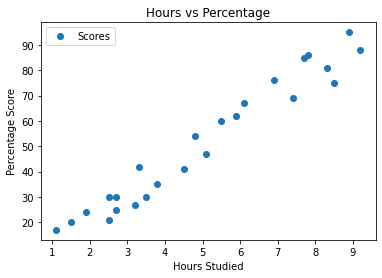

In [ ]:
# Plotting the distribution of scores vs number of hours

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

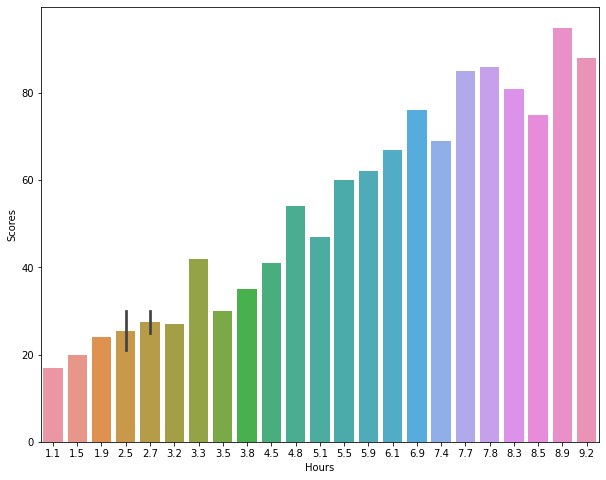

In [ ]:
# Bar graph representation of given data

plt.figure(figsize=(10,8))
sns.barplot(x=df['Hours'],y=df['Scores'])

**INFERENCE**: From the graph above we can see there is a positive relation between hours studied and scores


### Splitting the data set into dependent and independent features

In [ ]:
X = np.array(df['Hours']).reshape(-1, 1) 
Y = np.array(df['Scores']).reshape(-1, 1)

print('X_arr shape: ', X.shape)
print('Y_arr shape: ', Y.shape)

X_arr shape:  (25, 1)
Y_arr shape:  (25, 1)


### Splitting the data set (80% training set and 20% validation set )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (20, 1)
y_train shape:  (20, 1)
X_test shape:  (5, 1)
y_test shape:  (5, 1)


# Training Model 1 : Linear Regression

In [ ]:
linModel = LinearRegression()  
linModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the model fit

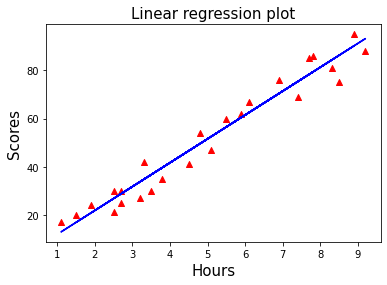

In [ ]:
# Plotting the regression line
line = linModel.coef_*X +linModel.intercept_

# Plotting for the training data
plt.scatter(X, Y,color='red',marker='^')
plt.plot(X, line,color='blue')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Linear regression plot",fontsize=15)
plt.show()

### Comparing the actual target values with model predicted target values

In [ ]:
linPrediction = linModel.predict(X_val)
df1 = pd.DataFrame({'Actual': y_val.reshape(-1,), 'Predicted': linPrediction.reshape(-1,)})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating model 1

In [ ]:
print('Training Accuracy:',(100*linModel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*linModel.score(X_val, y_val)).round(2),'%')
MAE1=mean_absolute_error(linPrediction,y_val)
RMSE1=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 1:',MAE1.round(2))
print('Root Mean Squared Error in Model 1:',RMSE1.round(2))

Training Accuracy: 95.16 %
Validation Accuracy 94.55 %
Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65


### Training Model 2 : Ridge Regression

In [ ]:
# Larger the alhpa value, Stronger the Regularization

rr = Ridge(alpha=1,random_state=0 )
rr.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

### Visualizing the model fit


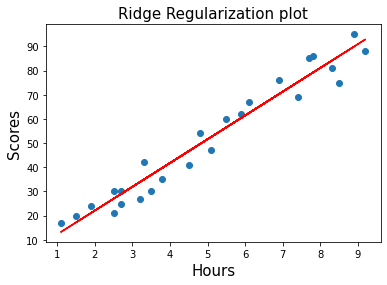

In [ ]:
plt.scatter(X, Y)
plt.plot(X, rr.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Ridge Regularization plot",fontsize=15)
plt.show()

### Comparing the actual target values with model predicted target values


In [ ]:
rrPrediction = rr.predict(X_val)
df1 = pd.DataFrame({'Actual': y_val.reshape(-1,), 'Predicted': rrPrediction.reshape(-1,)})  
df1

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


### Evaluating model 2

In [ ]:
print('Training Accuracy:',(100*rr.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*rr.score(X_val, y_val)).round(2),'%')
MAE3=mean_absolute_error(rrPrediction,y_val)
RMSE3=np.sqrt(mean_squared_error(y_val,rrPrediction))
print('Mean Absolute error in Model 1:',MAE3.round(2))
print('Root Mean Squared Error in Model 1:',RMSE3.round(2))

Training Accuracy: 95.15 %
Validation Accuracy 94.7 %
Mean Absolute error in Model 1: 4.09
Root Mean Squared Error in Model 1: 4.58


### Training model 3 : Lasso Regression

In [ ]:
lasso = Lasso(alpha=1,random_state = 0)
lasso.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

### Visualizing the Model Fit

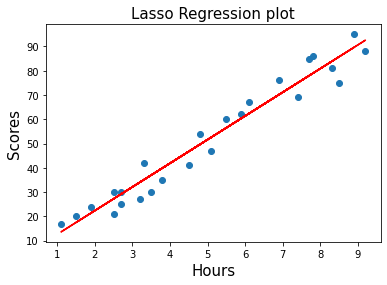

In [ ]:
plt.scatter(X, Y)
plt.plot(X, lasso.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Lasso Regression plot",fontsize=15)
plt.show()

### Comparing the actual target values with model predicted target values

In [ ]:
lassoPrediction = lasso.predict(X_val)
df1 = pd.DataFrame({'Actual': y_val.reshape(-1,), 'Predicted': lassoPrediction.reshape(-1,)})  
df1

,Actual,Predicted
0,20,17.489479
1,27,34.062443
2,69,75.007413
3,30,27.238282
4,62,60.384210


### Evaluating Model 3

In [ ]:
print('Training Accuracy:',(100*lasso.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*lasso.score(X_val, y_val)).round(2),'%')
MAE4=mean_absolute_error(lassoPrediction,y_val)
RMSE4=np.sqrt(mean_squared_error(y_val,lassoPrediction))
print('Mean Absolute error in Model 1:',MAE4.round(2))
print('Root Mean Squared Error in Model 1:',RMSE4.round(2))

Training Accuracy: 95.13 %
Validation Accuracy 94.83 %
Mean Absolute error in Model 1: 3.99
Root Mean Squared Error in Model 1: 4.53


### Training Model 4 : Random Forest Regressor

In [ ]:
RFmodel = RandomForestRegressor(n_estimators=10 ,random_state=0)
y_train_rf = y_train.reshape(20, )
RFmodel.fit(X_train,y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Visualizing a single decision tree

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = RFmodel.estimators_[4]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list((df.iloc[:,:-1]).columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

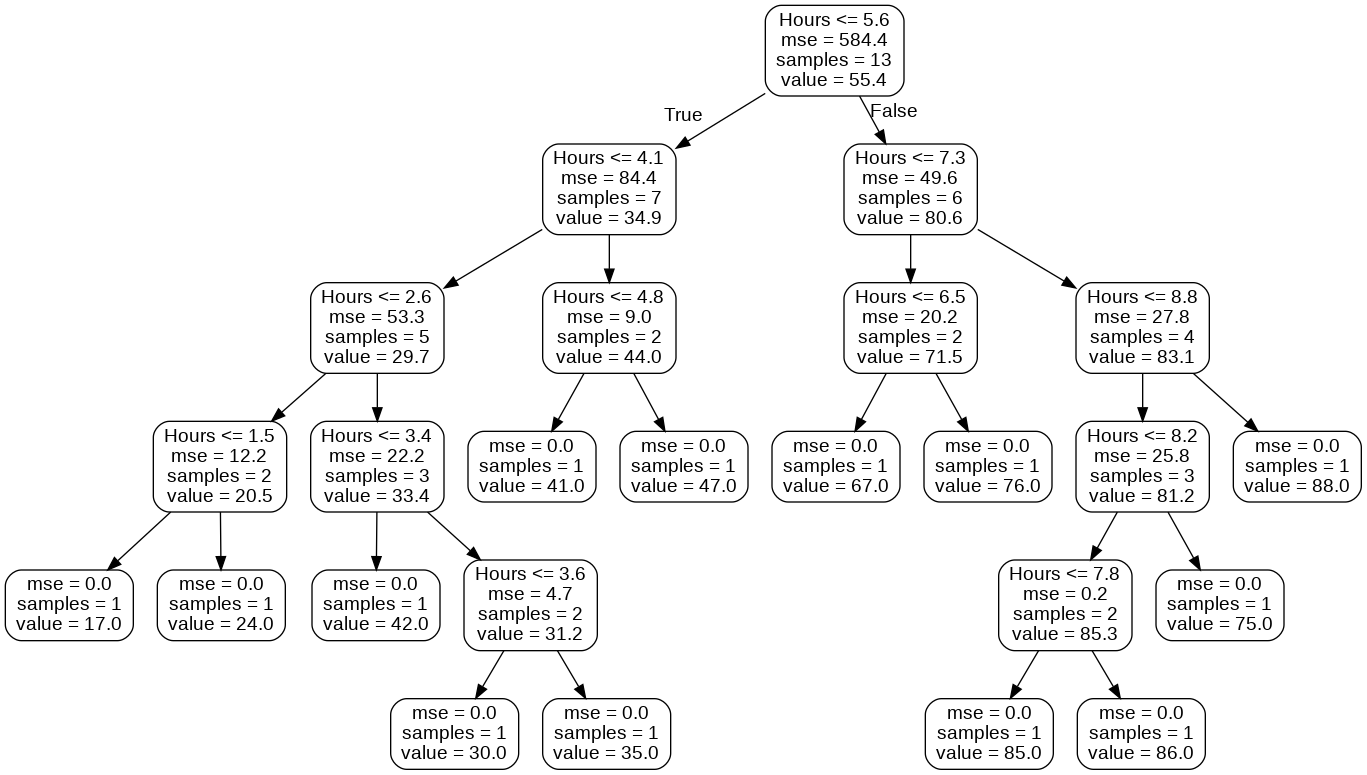

In [ ]:
from IPython.display import Image
Image(filename='tree.png')

### Comparing the actual target values with model predicted target values

In [ ]:
rf_Prediction = RFmodel.predict(X_val)
X1 = X_val.flatten()
df1 = pd.DataFrame({'Actual': y_val.reshape(-1,), 'Predicted': rf_Prediction.reshape(-1,)})  
df1

,Actual,Predicted
0,20,19.7
1,27,38.4
2,69,84.3
3,30,23.0
4,62,66.5


### Evaluating model 4

In [ ]:
print('Training Accuracy:',(100*RFmodel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*RFmodel.score(X_val, y_val)).round(2),'%')
MAE2=mean_absolute_error(rf_Prediction,y_val)
RMSE2=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 2:',MAE2.round(2))
print('Root Mean Squared Error in Model 2:',RMSE2.round(2))

Training Accuracy: 98.66 %
Validation Accuracy 78.12 %
Mean Absolute error in Model 2: 7.7
Root Mean Squared Error in Model 2: 4.65


### Training model 5 : Elastic Net model

In [ ]:
e_net = ElasticNet(alpha = 1) 
e_net.fit(X_train, y_train) 

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Visualizing the Model Fit

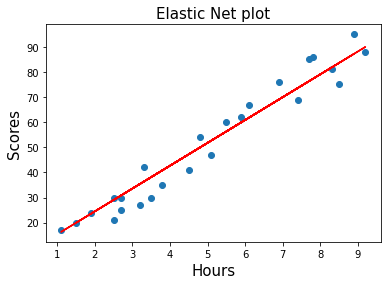

In [ ]:
plt.scatter(X, Y)
plt.plot(X, e_net.predict(X), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Elastic Net plot",fontsize=15)
plt.show()

### Comparing the actual target values with model predicted target values

In [ ]:
e_net_prediction = e_net.predict(X_val)
df1 = pd.DataFrame({'Actual': y_val.reshape(-1,), 'Predicted': e_net_prediction.reshape(-1,)})  
df1

,Actual,Predicted
0,20,19.939207
1,27,35.398658
2,69,73.592597
3,30,29.033002
4,62,59.951905


### Evaluating model 5

In [ ]:
print('Training Accuracy:',(100*e_net.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*e_net.score(X_val, y_val)).round(2),'%')
MAE5=mean_absolute_error(e_net_prediction,y_val)
RMSE5=np.sqrt(mean_squared_error(y_val,e_net_prediction))
print('Mean Absolute error in Model 5:',MAE5.round(2))
print('Root Mean Squared Error in Model 5:',RMSE5.round(2))

Training Accuracy: 94.51 %
Validation Accuracy 95.12 %
Mean Absolute error in Model 5: 3.21
Root Mean Squared Error in Model 5: 4.4


**INFERENCE**: Here we can see that model 5(Elastic Net) has the least mean absolute error and root mean squared error so we can use that model for our prediction.

## Predicting using Elastic Net Model

#### What will be predicted score of a student if he/she studies for 9.25 hours in a day?

In [ ]:
hours = 9.25
own_pred = e_net.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 9.25
Predicted Score = 90.42
